# TMDB 數據分析

## 第一部分：提出問題

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline

df = pd.read_csv('tmdb-movies (1).csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


## 問題1：獲利較佳的製片公司

A.每10年統計一次，前5大製片公司，前5大製片公司的市佔率變化(圓餅圖)

B.了解電影市場收入、毛利狀況


## 問題2：成功製片公司的選片法則

A.作為製片公司投資下一部賣座電影影該投入那些那電影? 依據近10年(2010s)的前5大製片商，分析其利獲利成功選片法則(Genera)

B.哪些電影類型投報率高？那些投報率低？

C.市佔率高的電影製片公司，和選擇電影類型(類型投報率高低)是否有相關？

# 第二部分:數據清理

# 2.1 缺失值處理：

總幾有10866行資料，缺失值共有9個字段，最多的為Homepage，共計7930筆資料缺失，其次為tagline，共計2824筆缺失，keyword共計1493筆缺失，production_company，共計1030筆缺失其他不足100筆缺失值的字段有cast、genres、imdb_id、overview。

針對缺失值不進行處理說明如下：
1. Homepage、tagline、keyword、imdb_id、overview，雖有缺失但不影響主要分析，
2. production_company、cast、genres、為主要分析字段，因此也不做處理，其中production_company缺失值偏高較為可惜，樣本數減少。

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

## 2.2異常值"0"

有0的字段有5個，包含budget、revenue、runtime、budget_adj、revenue_adj
這幾個字段都相當重要，若有數值為0需要刪除，避免影像分析結果。

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
column_mins=df.describe().min()
print(column_mins)

id               5.000000
popularity       0.000065
budget           0.000000
revenue          0.000000
runtime          0.000000
vote_count      10.000000
vote_average     0.935142
release_year    12.812941
budget_adj       0.000000
revenue_adj      0.000000
dtype: float64


In [7]:
zero_index=np.where(column_mins==0)
zero_column=column_mins.index[zero_index]
for name in zero_column:
    df=df[df[name]>0]

df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3855.000000,3855.000000,3.855000e+03,3.855000e+03,3855.000000,3855.000000,3855.00000,3855.000000,3.855000e+03,3.855000e+03
mean,39888.783398,1.191400,3.720183e+07,1.076589e+08,109.215824,527.611933,6.16786,2001.263294,4.423630e+07,1.370294e+08
std,67213.815955,1.475002,4.220291e+07,1.765248e+08,19.922166,879.868374,0.79504,11.281989,4.480403e+07,2.160944e+08
min,5.000000,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.20000,1960.000000,9.693980e-01,2.370705e+00
25%,6074.000000,0.462448,1.000000e+07,1.357645e+07,95.000000,71.000000,5.70000,1995.000000,1.309053e+07,1.834123e+07
50%,11322.000000,0.797298,2.400000e+07,4.479322e+07,106.000000,204.000000,6.20000,2004.000000,3.001558e+07,6.171861e+07
75%,38577.000000,1.368245,5.000000e+07,1.241530e+08,119.000000,580.000000,6.70000,2010.000000,6.061307e+07,1.632401e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.40000,2015.000000,4.250000e+08,2.827124e+09


## 2.3 文本字符串調整

Genres是重要的分析項目，但每一行的Genres都是由很多種類型組合，需要將每一個Genres拆開，並且利用Stack()將每一個Genres拆開為一行完整資料，方便統計。prodction_company也採取同樣做法。

In [8]:
a=df['production_companies'].str.split('|', expand=True).stack().reset_index(drop=True, level=1).rename('production_companies_split')
s=df['genres'].str.split('|', expand=True).stack().reset_index(drop=True, level=1).rename('genres_split')
df_split=df.join(s, how='left').join(a,how='left')
df_split.head(50)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres_split,production_companies_split
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Universal Studios
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Amblin Entertainment
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Legendary Pictures
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Fuji Television Network
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Dentsu
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Adventure,Universal Studios
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Adventure,Amblin Entertainment
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Adventure,Legendary Pictures
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Adventure,Fuji Television Network
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Adventure,Dentsu


# 第三部分：探索性數據分析

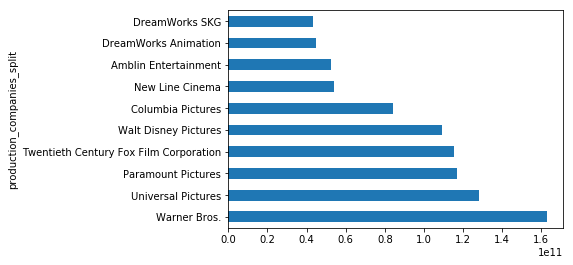

In [9]:
df_split.groupby('production_companies_split')['revenue'].sum().sort_values(ascending=False)[:10].plot.barh()

#依據Revenue找出前五大片商為：Warner Bros, Universal Pictures, Paramount Pictures, Twentieth Century Fox Film Corporation, Walt Disney Pictures,

In [10]:
labels=['1960s', '1970s', '1980s', '1990s', '2000s','2010s']
bins=[1960, 1970, 1980, 1990, 2000, 2010, 2020]
df_split['year']=pd.cut(df_split['release_year'],bins=bins,labels=labels)
#拆分時間每10年為一個間格做觀察(5個觀察期)

In [11]:
top_companies=['Warner Bros.', 'Universal Pictures','Paramount Pictures','Twentieth Century Fox Film Corporation', 'Walt Disney Pictures']
df_split['top_five_companies']=df_split['production_companies_split'].apply(lambda x: x if x in top_companies else 'another' )
#區分資料：前五大片商與非前五大片商(標記為Another)

In [12]:
companies_revenue=df_split.groupby(['year','top_five_companies'],as_index=False)['revenue'].sum()
#計算每10年，前五大片商與非前五大片商收入(Revenue)

In [13]:
market_revenue=df_split.groupby('year', as_index=False)['revenue'].sum().rename(columns={'revenue':'revenue_sum'}).sort_values(by='revenue_sum')
#計算每10年市場總收入(用於計算市場份額)

In [14]:
companies_budget=df_split.groupby(['year','top_five_companies'],as_index=False)['budget'].sum()
#計算前五大片商，每10年預算(成本)

In [15]:
market_value=companies_revenue.merge(market_revenue, on='year',how='left').merge(companies_budget, on=['top_five_companies', 'year'],how='left')
market_value['market_share']=market_value['revenue']/market_value['revenue_sum']
market_value['profit']=market_value['revenue']-market_value['budget']
market_value['margin rate']=market_value['profit']/market_value['revenue']
market_value.head(10)
#合併市場收入與五大片商收入表格，計算前五大片商每10年市占率變化。使用合併表格market_value進行市占率圖表繪製

,year,top_five_companies,revenue,revenue_sum,budget,market_share,profit,margin rate
0,1960s,Paramount Pictures,3.929863e+08,17785901652,2.650600e+07,0.022095,3.664803e+08,0.932552
1,1960s,Twentieth Century Fox Film Corporation,1.570612e+09,17785901652,4.779000e+08,0.088307,1.092712e+09,0.695724
2,1960s,Universal Pictures,4.396255e+08,17785901652,7.154064e+07,0.024718,3.680849e+08,0.837269
3,1960s,Walt Disney Pictures,6.175308e+08,17785901652,1.200000e+07,0.034720,6.055308e+08,0.980568
4,1960s,Warner Bros.,3.639355e+08,17785901652,9.715084e+07,0.020462,2.667847e+08,0.733055
5,1960s,another,1.440121e+10,17785901652,2.403658e+09,0.809698,1.199755e+10,0.833093
6,1970s,Paramount Pictures,2.855238e+09,51435726195,5.456500e+08,0.055511,2.309588e+09,0.808895
7,1970s,Twentieth Century Fox Film Corporation,4.951152e+09,51435726195,1.851000e+08,0.096259,4.766052e+09,0.962615
8,1970s,Universal Pictures,4.211617e+09,51435726195,6.666540e+08,0.081881,3.544963e+09,0.841711
9,1970s,Walt Disney Pictures,NaN,51435726195,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Market Share')

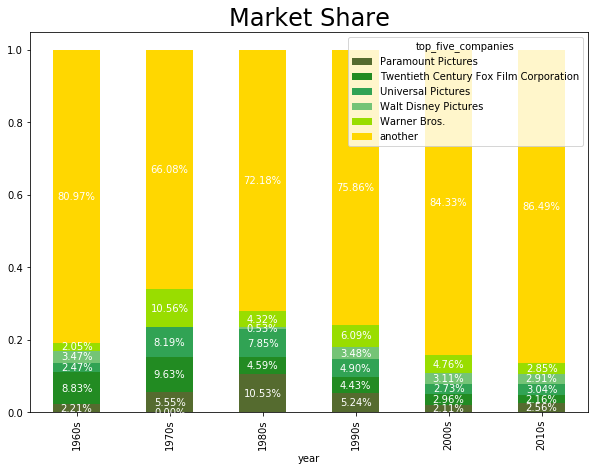

In [16]:
colors = ["#556B2F","#228B22", "#31A354","#74C476","#99DD00","#FFD700", ]
pivot_df = market_value.pivot(index='year', columns='top_five_companies', values='market_share')
ax=pivot_df.plot.bar(stacked=True, color=colors, figsize=(10,7))
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
#     print(width, height)

    ax.text(x+width/2, 
            y+height/2, 
            '%.2f%%' % (height*100), 
            horizontalalignment='center', 
            verticalalignment='center',
           color='W')
plt.title("Market Share",fontsize=24)
#每隔10年市占率變化(百分比堆疊直方圖)

Text(0.5, 1.0, 'Market Value')

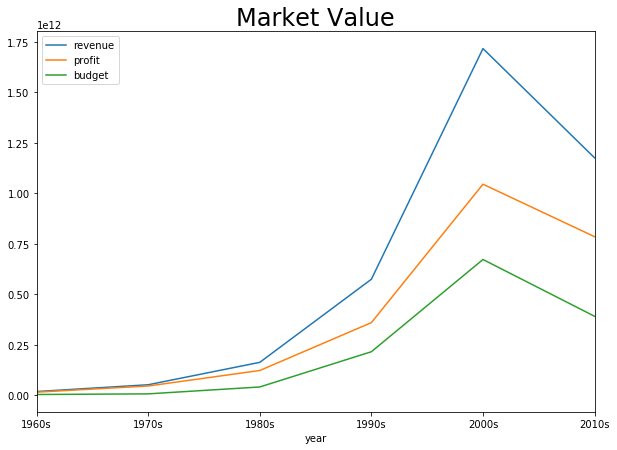

In [17]:
market_value.groupby('year')['revenue', 'profit','budget'].sum().plot(figsize=(10,7))
plt.title("Market Value",fontsize=24)

Text(0.5, 1.0, 'Margin Rate')

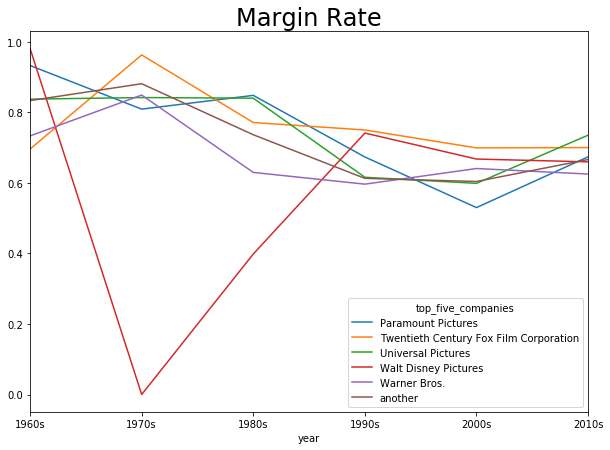

In [18]:
market_value.groupby(['year','top_five_companies'])['margin rate'].sum().unstack().plot(figsize=(10,7))
plt.title("Margin Rate",fontsize=24)

## 觀察市場趨勢1：市場變化與五大片商市場份額

依據結果顯示，前五大製片商市占率佔比逐年下降，且各家佔比變化由1-2家獨大，至1990s年後變成5大片商市占率加總下滑，市場越趨競爭。

1960s：最大製片商為Twentieth Century Fox Film

1970s：Twentieth Century Fox Film仍為最大製片商，Univer Pictures擴大事業版圖成為第二大製片商，Paramount Pictures為第三

1980s：Paramount成為第一大製片商，Universal Pictures維持第二，Twentiesth Century Fox Film衰退為第三

1990s-2010s：整體市場總量自1990s年後大幅度成長，2010s的市場量(market value)已為1960s的66倍,但市場卻越加競爭，五大製片商的整體市場份額也逐年下降，由1970s的33.9%，至2010s降至13.5%，且五大製片商彼此之間的差距逐年下降，前五大製片商市占率約當。此外，整體市場毛利逐年下降，由19060s時期90%-80%毛利，1990s至2010s降至80%-60%毛利。在這麼競爭的市場環境當中，做出正確的選片原則更顯重要，接下來將分析各家片商的市場策略，依據genres了解各家製片公司的資源投放(budget)與收入(revenue)之間的關係。

Counter({'Drama': 1320, 'Thriller': 933, 'Action': 844, 'Comedy': 803, 'Adventure': 515, 'Crime': 476, 'Science Fiction': 386, 'Romance': 346, 'Horror': 296, 'Fantasy': 264, 'Family': 206, 'Mystery': 179, 'Animation': 132, 'History': 90, 'War': 87, 'Music': 85, 'Western': 31, 'Documentary': 17})


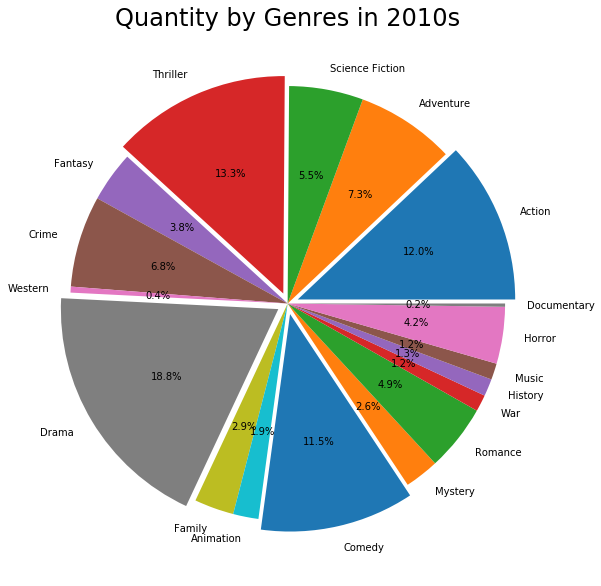

In [45]:
fig=plt.figure(figsize=(10,10))
count_genres=Counter(df_split.query("year=='2010s'")['genres_split'])
print(count_genres)
genres=list(count_genres.keys())
genres_num=list(count_genres.values())
b1=pd.Series(genres_num)/sum(genres_num)
explode=(b1>=0.1)/20
plt.pie(genres_num,labels=genres,autopct='%1.1f%%',explode=explode)
plt.title("Quantity by Genres in 2010s",fontsize=24)
plt.show()


Text(0.5, 1.0, 'Market Value by Genres in 2010s')

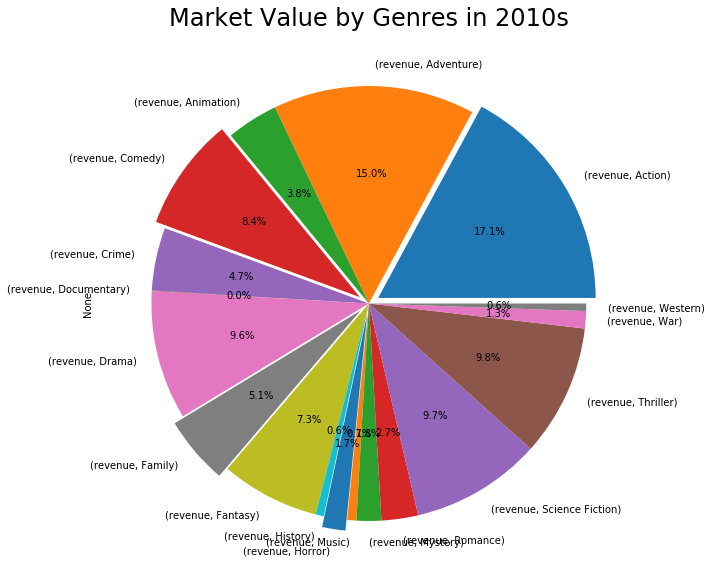

In [43]:
companies_genres=df_split.query("year=='2010s'").groupby(['genres_split'])['revenue'].sum().to_frame().unstack().plot.pie(figsize=(10,10),autopct='%1.1f%%',explode=explode)
plt.title("Market Value by Genres in 2010s",fontsize=24)


Text(0.5, 1.0, 'Budget by Genres in 2010s')

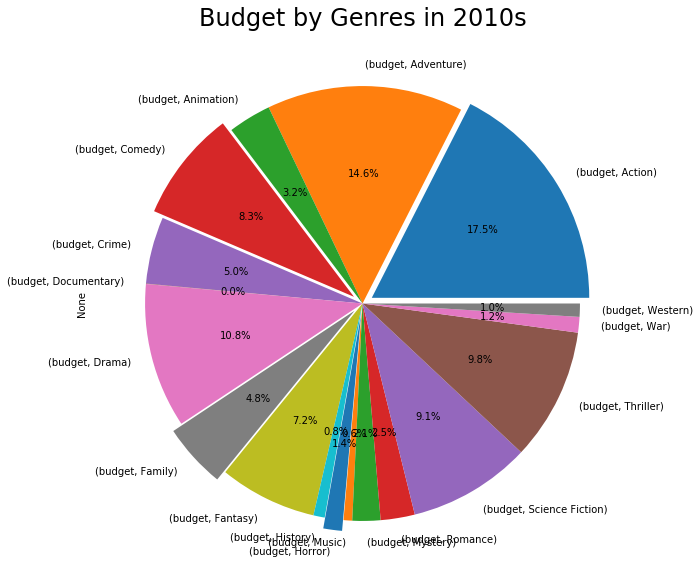

In [46]:
companies_genres=df_split.query("year=='2010s'").groupby(['genres_split'])['budget'].sum().to_frame().unstack().plot.pie(figsize=(10,10),autopct='%1.1f%%',explode=explode)
plt.title("Budget by Genres in 2010s",fontsize=24)

## 觀察市場趨勢2：各類型(Genres)收入與成本比較

2010s年代，

A.電影市場前五大票房為電影類型為Action(17.1%)、Adventure(15.0%)、Thriller(9.8%)、Science Fiction(9.7%)、Drama(9.6%)。

B.收入與預算佔比大致相符

C.電影發行數量最多的為Drama(18.8%)、第二位為Thriller(13.3%)、第三位為Action(12.0%)、第四位為Comedy(11.5%)、第五位為Adventure(7.3%)



## 觀察市場趨勢3：投報率較佳與較差類型影片(Genres)
A.投報率較差的電影類型：(市場發行量佔比>市場收入佔比)

■Drama的電影發行量第一位(18.8%)，但收入為第五位(9.6%),差異9.2%,為投報率最差的類型影片。

■Thriller發行量佔比為13.3%，但只為市場帶來9.8%的收入，差異3.5%。

■Comedy發行量佔比為11.5%，但只為市場帶來8.4%的收入,差異3.1%。

■Crime發行量佔比為6.8%，但只為市場帶來4.7%的收入，差異2.1%。


B.投報率較佳的電影類型：(市場發行量佔比<市場收入佔比)

■Action和Adventure發行量為分別為第(12.0%)和第五名(7.3%)，但票房收入佔比較高，有17.1%和15.0%

■Science Fiction發行量佔比為5.5%，但只為市場帶來9.7%的收入，差異4.2%。

■Family、Animation、Fantasy雖然市場發行量不高，分別為2.9%、1.9%、3.8%,但卻為市場創造5.1%、3.8%、7.3%的收入。屬於投報率較高的類型。

Text(0.5, 0.98, 'Budget by Genres in 2010s for TOP 5 Companies')

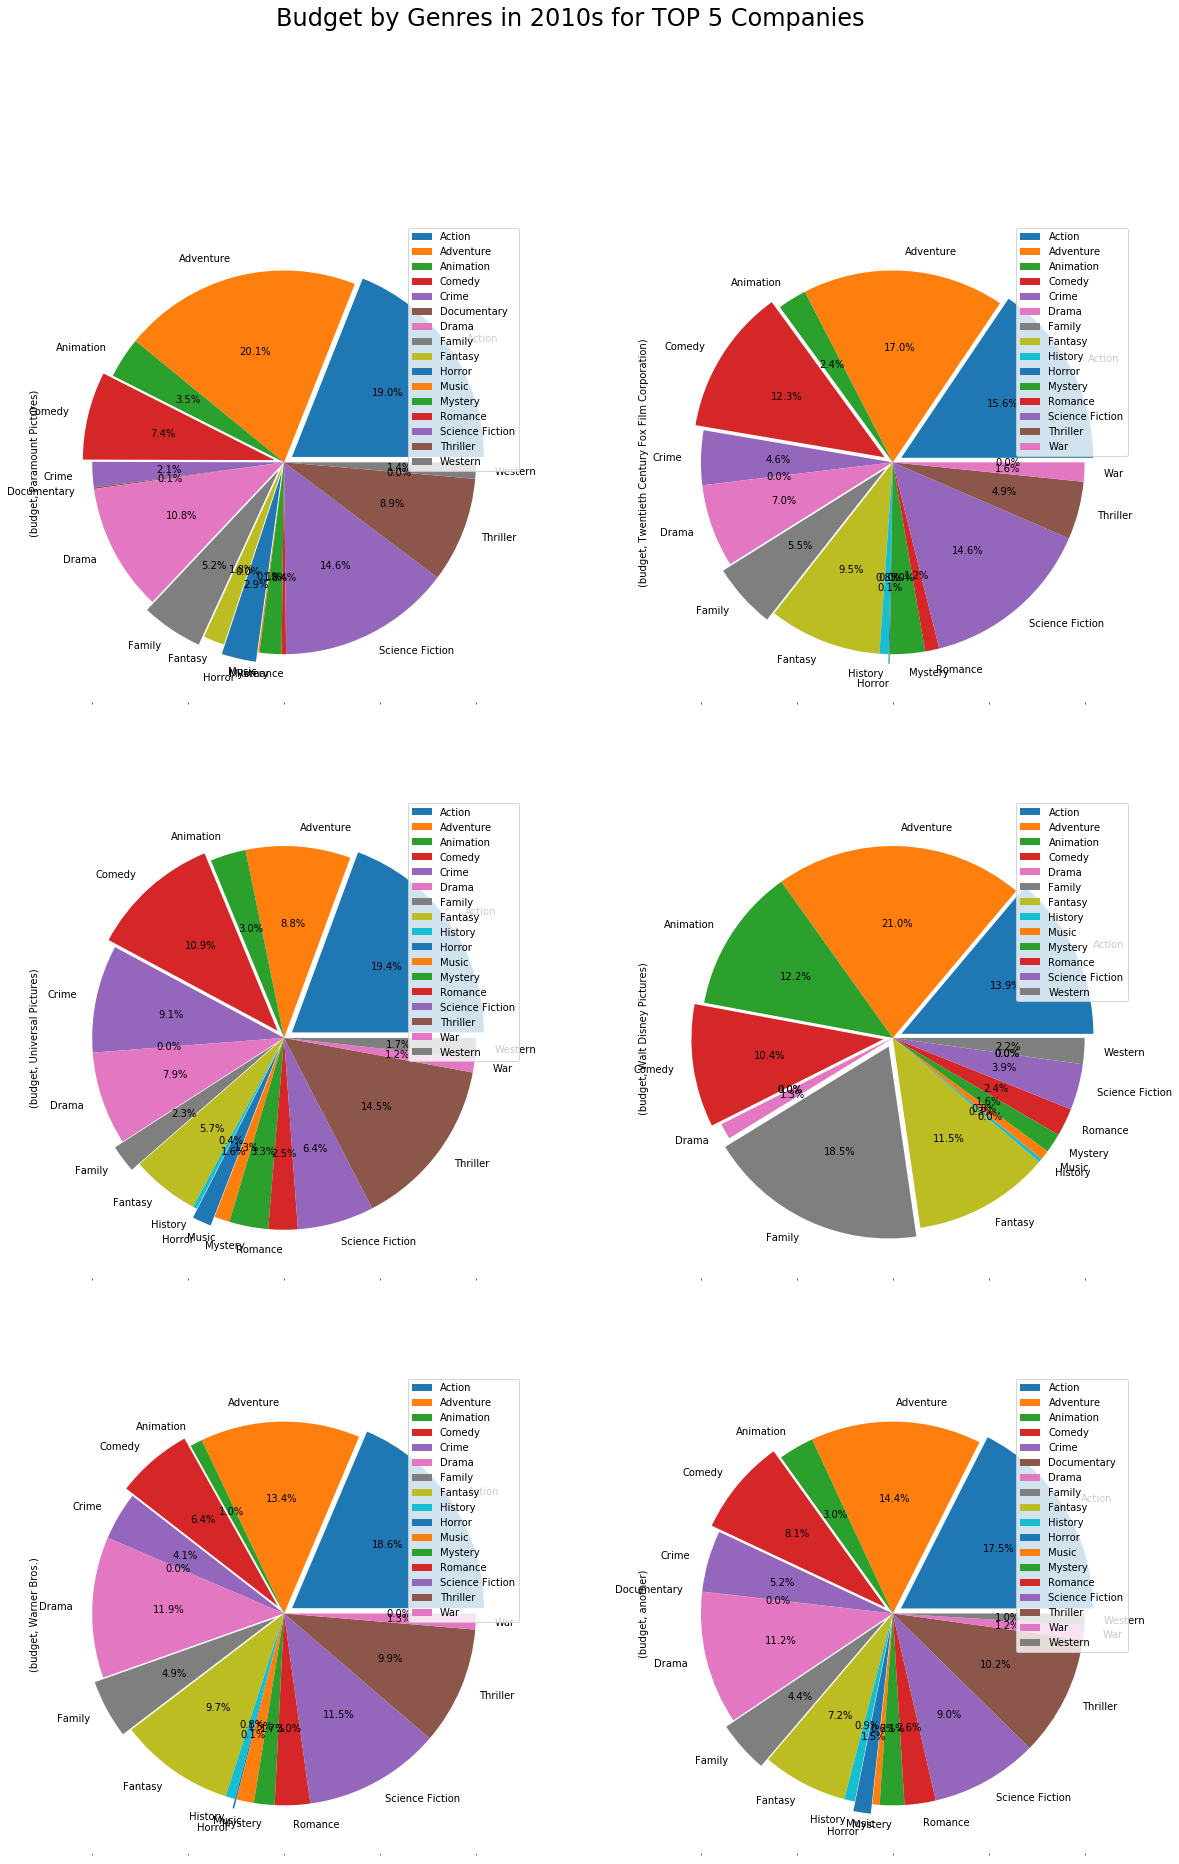

In [60]:
companies_genres=df_split.query("year=='2010s'").groupby(['genres_split','top_five_companies'])['budget'].sum().to_frame().unstack()
companies_genres.plot.pie(subplots=True, figsize=(20,30), legend=True, layout=(3,2),autopct='%1.1f%%',explode=explode)
plt.suptitle("Budget by Genres in 2010s for TOP 5 Companies",fontsize=24)


## 市場觀察3：前五大片商與非前五大片商的選片策略

★A.Universal Pictures：於2010s年代市占率為5大片商最高，市占率3.01%。

市場投入策略為Action(19.4%)、Thriller(14.5%)、Comedy(10.9%)、Crime(9.1%)、Adventure(8.8%),前五大類型共計佔比62.7%。

Action、Thriller、Adventure與市場前五大趨勢相符;另外又著重市場細分領域：Comedy和Crime，但此類型電影投報率較差。



★B.Walt Disney Picture：於2010s年代市占率為5大片商最第二位，市占率為2.9%

專注於Adventure(21%)、Family(18.5%)、Action(13.9%)、Animation(12.2%)、Fantasy(11.5%)、Comedy(10.4%)，前五大類型共計佔比77.1%。

其中Adventure和Action與市場趨勢相符，其餘類型鎖定特定細分市場，專注於Family、Animation、Fantasy，此類投報率較高的類型電影。



★C.Warner Bros：於2010s年代市占率為5大片商最第三位，市占率為2.85%

專注於Action(18.6%)、Adventure(13.4%)、Drama(11.9%)、Science Fiction(11.5%)、Thriller(9.9%)，前五大類型共計佔比65.3%。

其中含有投報率較低的Drama和Thriller


★D.Paramount Pictures：於2010s年代市占率為5大片商最第四位，市占率為2.56%

專注於Adventure(20.1%)、Action(19.0%)、Science Fiction(14.6%)、Drama(10%)、Thriller(8.9%)，前五大類型共計佔比72.6%。

其中含有投報率較低的Drama和Thriller


★E. Twentieth Century Fox Film Corporation：於2010s年代市占率為5大片商最第5位，市占率為2.16%

專注於Adventure(17.0%)、Action(15.6%)、Science Fiction(14.6%)、Comedy(12.3%)、Fantasy(9.5%)，前五大類型共計佔比69%。

其中含有投報率較低的Comedy

★F.非前五大片商(Another)

前五大類型佔比共計62.3%，分別為Action(17.5%)、Adventure(14.4%)、Drama(11.2%)、Thriller(10.2%)、Science Ficiton(9%)

其中含有投報率較低的Drama和Thriller


# 第四部分：結論

研究發現：

A.在越來越競爭的電影市場中，選擇投報率較高(觀察指標：市場發行量佔比<市場收入佔比)的電影類型是影響市占率的重要因素，


■投報率較差的電影類型：(市場發行量佔比>市場收入佔比)，包括Drama、Thriller、Comedy、Crime。

■投報率較佳的電影類型：(市場發行量佔比<市場收入佔比)，包括Action、Adventure、Science Fiction、Animation、Family、Fantasy。

■市占率第一和第二的Universal Pictures和Walt Disney Picture的選片原則都是以投報率較高的電影類型作為主要選擇，且投報率低。

■市占率第三和第四的Paramount Pictures和Warner Bros.以及非前五大片商，影片類型選擇包含投報率較低的Drama和Thriller，且佔該公司於2010s年投入電影資源的20%左右。

■唯Twentieth Century Fox Film Corporation，雖然選片原則也是投報率較高的電影，僅有Comedy為投報率較低，其市占率僅位居於第五，是為例外。


B.前五大片商選片類型集中程度都有62%以上，但選片集中程度越高，並非直接影響市占率，市占率第一的Universal Picture的前五大類型影片只有62.7%,並非最高。但Walt Disney Picture的集中程度相當高，有77.1%為前五大片商中最高，著重在特定的細分領域，定位非常明確，選片集中程度可以最為後續觀察的重點。